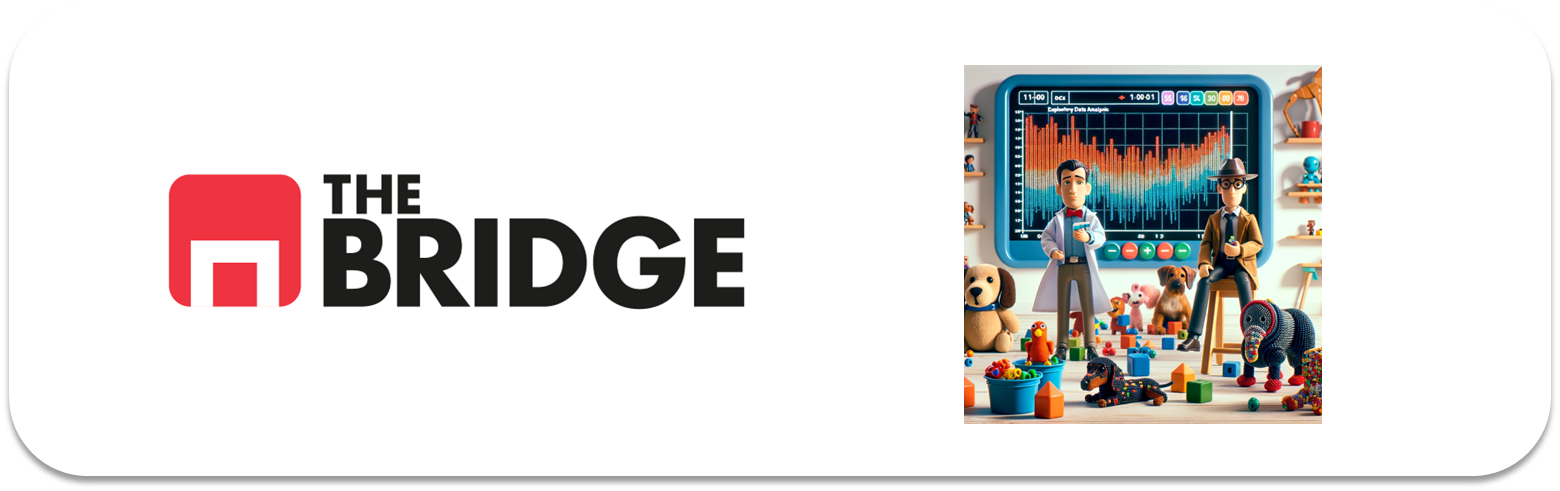

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


from bootcampviztools import (
    plot_categorical_relationship_fin,
    plot_categorical_numerical_relationship,
    grafico_dispersion_con_correlacion,
    bubble_plot
)


## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = sns.load_dataset("titanic")


In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_titanic = df_titanic.drop(
    columns=["survived", "pclass", "embarked", "deck"])


KeyError: "['survived', 'pclass', 'embarked', 'deck'] not found in axis"

In [8]:
df_titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [12]:
df_titanic["family_members"] = df_titanic["sibsp"] + df_titanic["parch"]

df_titanic = df_titanic.drop(columns=["sibsp", "parch"])

df_titanic.columns


Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
print(df_titanic["embark_town"].isna().sum())


2


In [16]:
embark_town_mode = df_titanic["embark_town"].mode()[0]
# Imputar los nulos con la moda
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(embark_town_mode)

df_titanic["embark_town"].isna().sum()



np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
df_titanic["age"].isna().sum()

np.int64(177)

In [20]:
df_titanic["age"] = df_titanic["age"].fillna(
    df_titanic.groupby("who")["age"].transform("median")
)

df_titanic["age"].isna().sum()


np.int64(0)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [28]:
#1.
#absolutos, hombres/mujeres/niños

abs_who = pd.crosstab(df_titanic["who"], df_titanic["alive"])
abs_who

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [29]:
#relativos hombres/mujeres/niños

rel_who = pd.crosstab(df_titanic["who"], df_titanic["alive"], normalize="index") * 100
rel_who.round(2)


alive,no,yes
who,,
child,40.96,59.04
man,83.61,16.39
woman,24.35,75.65


In [32]:
#edad/supervivencia

df_titanic["is_child"] = np.where(df_titanic["who"] == "child", "child", "adult")
abs_child = pd.crosstab(df_titanic["is_child"], df_titanic["alive"])
print(abs_child)

# Tasa de supervivencia adulto vs niño
rel_child = pd.crosstab(df_titanic["is_child"], df_titanic["alive"], normalize="index") * 100
rel_child.round(2)



alive      no  yes
is_child          
adult     515  293
child      34   49


alive,no,yes
is_child,,
adult,63.74,36.26
child,40.96,59.04


In [33]:
#2 Absolutos: supervivencia por clase
abs_class = pd.crosstab(df_titanic["class"], df_titanic["alive"])
abs_class

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [38]:
# Relativos: tasa de supervivencia dentro de cada clase
rel_class = pd.crosstab(df_titanic["class"], df_titanic["alive"], normalize="index") * 100
rel_class.round(2)


alive,no,yes
class,,
First,37.04,62.96
Second,52.72,47.28
Third,75.76,24.24


In [35]:
#3. Absolutos: supervivencia por ciudad de embarque
abs_city = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
abs_city


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


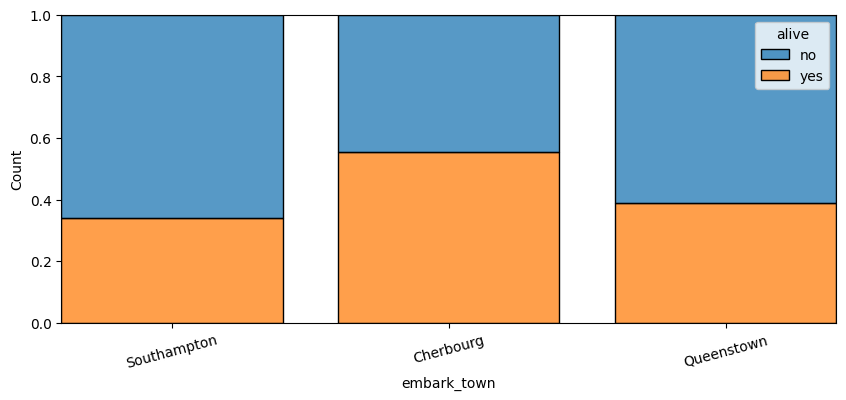

In [36]:
# Relativos: tasa de supervivencia por ciudad
rel_city = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"], normalize="index") * 100
rel_city.round(2)
# Visual: relativos
plt.figure(figsize=(10,4))
sns.histplot(data=df_titanic, x="embark_town", hue="alive", multiple="fill", shrink=0.8)
plt.xticks(rotation=15)
plt.show()


In [39]:
#4. supervicencia/precio billete
df_titanic.groupby("alive")["fare"].describe()


,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


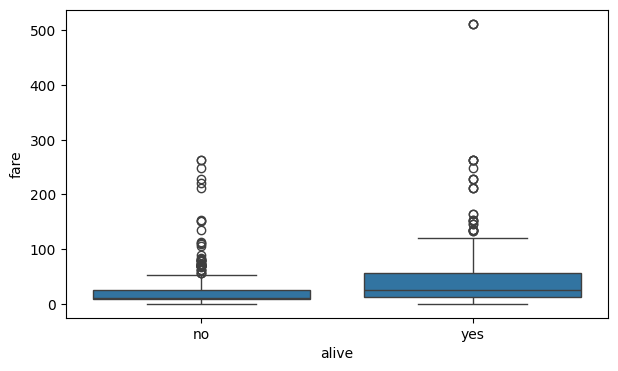

In [ ]:
# Boxplot: comparar fare y supervivencia
plt.figure(figsize=(7,4))
sns.boxplot(data=df_titanic, x="alive", y="fare")
plt.show()


In [41]:
#5. pasajeros que no pagaron y que ocurrió con quien más pagó.

# Filtramos los pasajeros con fare = 0
free_passengers = df_titanic[df_titanic["fare"] == 0]
free_passengers.shape

# Perfil de los que no pagaron
free_passengers[["class","sex","who","embark_town","alive","fare","age","family_members","alone"]].head(20)


,class,sex,who,embark_town,alive,fare,age,family_members,alone
179,Third,male,man,Southampton,no,0.0,36.0,0,True
263,First,male,man,Southampton,no,0.0,40.0,0,True
271,Third,male,man,Southampton,yes,0.0,25.0,0,True
277,Second,male,man,Southampton,no,0.0,30.0,0,True
302,Third,male,man,Southampton,no,0.0,19.0,0,True
413,Second,male,man,Southampton,no,0.0,30.0,0,True
466,Second,male,man,Southampton,no,0.0,30.0,0,True
481,Second,male,man,Southampton,no,0.0,30.0,0,True
597,Third,male,man,Southampton,no,0.0,49.0,0,True
633,First,male,man,Southampton,no,0.0,30.0,0,True


In [42]:
print(free_passengers["class"].value_counts())
print(free_passengers["alive"].value_counts())

class
Second    6
First     5
Third     4
Name: count, dtype: int64
alive
no     14
yes     1
Name: count, dtype: int64


In [43]:
# Persona que más pagó
max_fare = df_titanic["fare"].max()
most_expensive = df_titanic[df_titanic["fare"] == max_fare]
max_fare, most_expensive[["class","sex","who","age","embark_town","alive","fare","family_members","alone"]]


(np.float64(512.3292),
      class     sex    who   age embark_town alive      fare  family_members  \
 258  First  female  woman  35.0   Cherbourg   yes  512.3292               0   
 679  First    male    man  36.0   Cherbourg   yes  512.3292               1   
 737  First    male    man  35.0   Cherbourg   yes  512.3292               0   
 
      alone  
 258   True  
 679  False  
 737   True  )

In [44]:
#6. # Tabla numérica: media/mediana de fare por ciudad y estado (alive)
fare_city_alive = df_titanic.pivot_table(
    values="fare",
    index="embark_town",
    columns="alive",
    aggfunc=["mean","median","count"]
)
fare_city_alive


mean              median           count     
alive               no        yes       no       yes    no  yes
embark_town                                                    
Cherbourg    35.443335  79.720926  14.4583  56.92920    75   93
Queenstown   13.335904  13.182227   7.7500   7.80835    47   30
Southampton  20.743987  39.916514  10.5000  26.00000   427  219

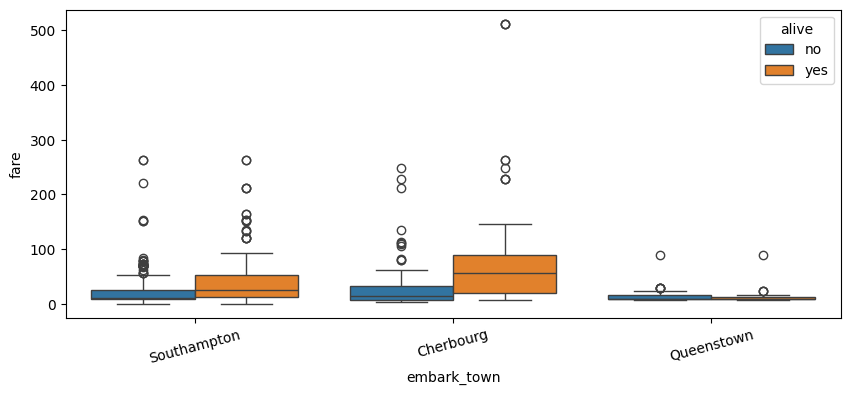

In [45]:
# Boxplot
plt.figure(figsize=(10,4))
sns.boxplot(data=df_titanic, x="embark_town", y="fare", hue="alive")
plt.xticks(rotation=15)
plt.show()


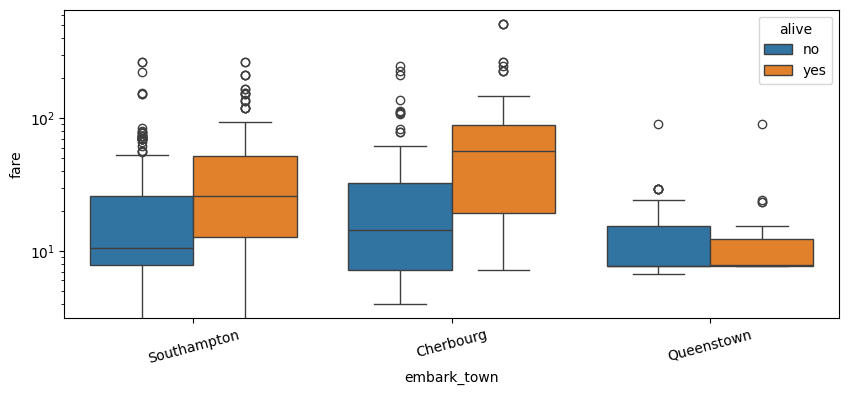

In [47]:
#sin outliers
plt.figure(figsize=(10,4))
sns.boxplot(data=df_titanic, x="embark_town", y="fare", hue="alive")
plt.yscale("log")
plt.xticks(rotation=15)
plt.show()


In [48]:
#7. que grupo de clase y edad sobrevivió más:
# Creamos grupos de edad para poder cruzar con class
age_bins = [0, 12, 17, 35, 55, np.inf]
age_labels = ["0-12", "13-17", "18-35", "36-55", "56+"]

df_titanic["age_group"] = pd.cut(df_titanic["age"], bins=age_bins, labels=age_labels, include_lowest=True)

# Absolutos: nº de supervivientes por (class, age_group)
abs_class_age = pd.crosstab([df_titanic["class"], df_titanic["age_group"]], df_titanic["alive"])
abs_class_age.sort_values(by="yes", ascending=False).head(15)


alive              no  yes
class  age_group          
Third  18-35      266   84
First  18-35       33   67
       36-55       30   48
Second 18-35       64   47
Third  0-12        28   20
Second 36-55       25   18
       0-12         0   17
First  56+         16   10
Third  13-17       21    9
First  13-17        0    8
Third  36-55       51    5
Second 13-17        2    4
First  0-12         1    3
Second 56+          6    1
Third  56+          6    1

In [49]:
# Relativos: tasa de supervivencia dentro de cada combinación (class, age_group)
rel_class_age = pd.crosstab([df_titanic["class"], df_titanic["age_group"]], df_titanic["alive"], normalize="index") * 100
rel_class_age = rel_class_age.round(2)
rel_class_age.sort_values(by="yes", ascending=False).head(15)


alive                no     yes
class  age_group               
First  13-17       0.00  100.00
Second 0-12        0.00  100.00
First  0-12       25.00   75.00
       18-35      33.00   67.00
Second 13-17      33.33   66.67
First  36-55      38.46   61.54
Second 18-35      57.66   42.34
       36-55      58.14   41.86
Third  0-12       58.33   41.67
First  56+        61.54   38.46
Third  13-17      70.00   30.00
       18-35      76.00   24.00
Second 56+        85.71   14.29
Third  56+        85.71   14.29
       36-55      91.07    8.93

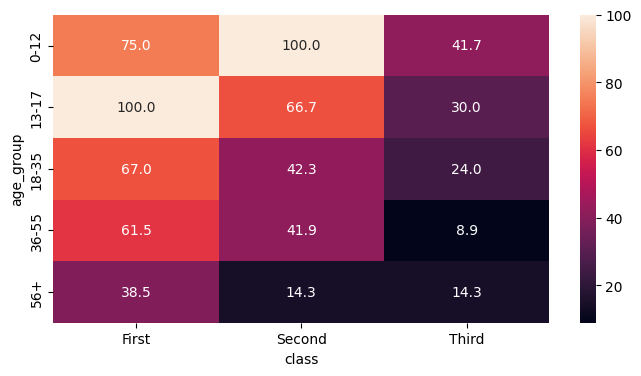

In [50]:
# Heatmap de tasa de supervivencia por (edad, clase)
survival_rate_matrix = pd.crosstab(
    df_titanic["age_group"],
    df_titanic["class"],
    values=(df_titanic["alive"] == "yes").astype(int),
    aggfunc="mean"
) * 100

plt.figure(figsize=(8,4))
sns.heatmap(survival_rate_matrix, annot=True, fmt=".1f")
plt.show()


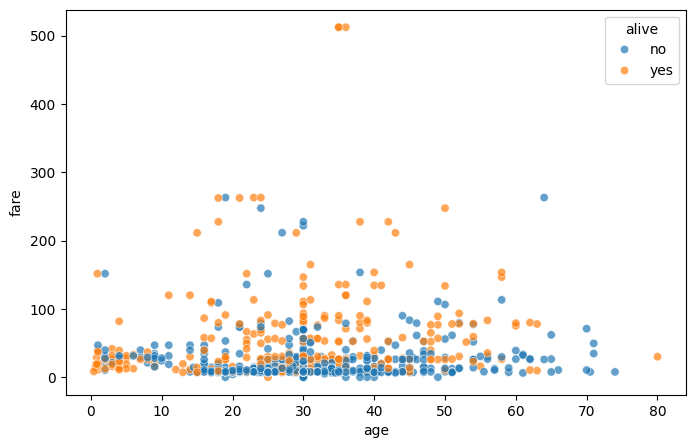

In [51]:
#8. Edad/coste billete/supervivencia

# Scatter age vs fare con color por supervivencia
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", alpha=0.7)
plt.show()


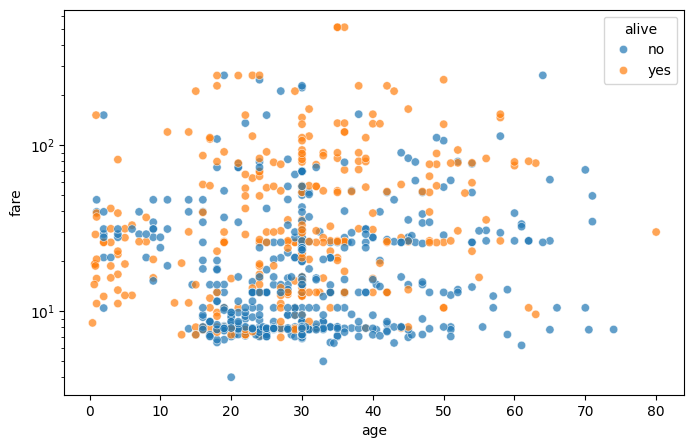

In [52]:
# Mismo scatter en escala log para ver mejor la parte alta de fare
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", alpha=0.7)
plt.yscale("log")
plt.show()


In [54]:
df_titanic.groupby("alive")[["age", "fare"]].agg(["mean", "median"])

age              fare       
            mean median       mean median
alive                                    
no     30.483607   30.0  22.117887   10.5
yes    28.595526   30.0  48.395408   26.0

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?